/Users/xrz/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


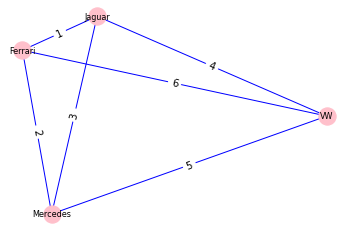

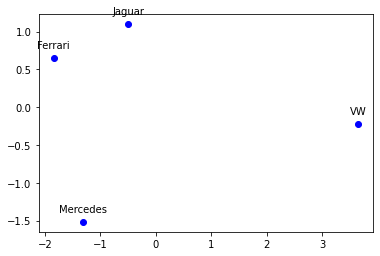

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import numpy as np

# 定义一个旋转矩阵函数
def rotate_positions(pos, angle):
    theta = np.radians(angle)  # 将角度转换为弧度
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    pos_rotated = np.dot(pos, rotation_matrix)  # 应用旋转矩阵到所有位置
    return pos_rotated

# 定义邻接矩阵，这里使用一个简单的例子
adjacency_matrix = [
    [0, 3, 2, 5],
    [3, 0, 1, 4],
    [2, 1, 0, 6],
    [5, 4, 6, 0]
]

# 创建无向图
G = nx.Graph()

# 添加带权重的边到图中
for i, row in enumerate(adjacency_matrix):
    for j, weight in enumerate(row):
        if i < j:  # 避免重复添加边
            G.add_edge(i, j, weight=weight)

# 使用多维缩放算法来定位节点
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=6)
pos = mds.fit_transform(adjacency_matrix)
pos = rotate_positions(pos, 90)

# 把MDS算法计算出的坐标转换成NetworkX格式的pos字典
pos_nx = {i: pos[i].tolist() for i in range(len(pos))}
fig, ax = plt.subplots()
# 绘制图形，节点名称自定义
node_labels = {3: 'VW', 2: 'Ferrari', 1: 'Jaguar', 0:"Mercedes"}
nx.draw(G, pos=pos_nx, labels=node_labels,edge_color = 'blue', with_labels=True, node_color='pink',font_size=8,ax = ax)

# 边的权重标签
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos_nx, edge_labels=edge_labels,font_size=10, ax = ax)



plt.savefig("MDS.png",transparent = True)
# 显示图形
plt.show()

x = [i[0] for i in pos]
y = [i[1] for i in pos]
for i, txt in enumerate(["Mercedes", "Jaguar", "Ferrari", "VW"]):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha="center")


plt.scatter(x,y,color = 'blue')
plt.savefig("cars_adj.png",transparent = True)
